In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from PIL import Image
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout



In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)
    
    for a in images:
        
        try:
            
            image = Image.open(path + '\\' + a)
            image = image.resize((30,30))
            image = np.array(image)
            
            data.append(image)
            labels.append(i)
            
        except:
            
            print ("Error loading image")
            
data = np.array(data)
labels = np.array(labels)

In [4]:
data.shape

(39209, 30, 30, 3)

In [5]:
labels.shape

(39209,)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

#print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)

y_train = to_categorical(y_train,43)
y_test = to_categorical(y_test,43)

In [16]:
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(31367, 30, 30, 3) (7842, 30, 30, 3) (31367, 43) (7842, 43)


In [17]:
## Extra exploration
a = tf.keras.utils.to_categorical([0, 1, 2, 3, 5])
print (a)


[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1.]]


In [21]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

# Compile the model
model.compile(loss=tf.keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])


In [18]:
## Extra exploration
X_train.shape[1:]

(30, 30, 3)

In [22]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 26, 26, 32)        2432      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 22, 22, 32)        25632     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 9, 9, 64)          18496     
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 7, 7, 64)          36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 64)         

In [23]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))

Epoch 1/15
491/491 [==============================] - 119s 243ms/step - loss: 2.1293 - accuracy: 0.4642 - val_loss: 0.7175 - val_accuracy: 0.8205
Epoch 2/15
491/491 [==============================] - 118s 241ms/step - loss: 0.8667 - accuracy: 0.7533 - val_loss: 0.3850 - val_accuracy: 0.8971
Epoch 3/15
491/491 [==============================] - 109s 221ms/step - loss: 0.5571 - accuracy: 0.8371 - val_loss: 0.1874 - val_accuracy: 0.9466
Epoch 4/15
491/491 [==============================] - 115s 234ms/step - loss: 0.3967 - accuracy: 0.8847 - val_loss: 0.1346 - val_accuracy: 0.9605
Epoch 5/15
491/491 [==============================] - 103s 210ms/step - loss: 0.3339 - accuracy: 0.9023 - val_loss: 0.1297 - val_accuracy: 0.9680
Epoch 6/15
491/491 [==============================] - 126s 257ms/step - loss: 0.2869 - accuracy: 0.9170 - val_loss: 0.0823 - val_accuracy: 0.9765
Epoch 7/15
491/491 [==============================] - 115s 234ms/step - loss: 0.2510 - accuracy: 0.9290 - val_loss: 0.0843 -

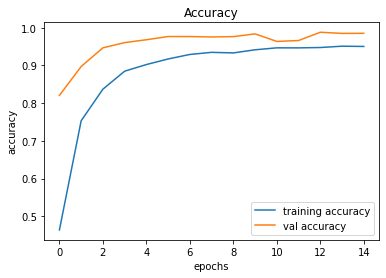

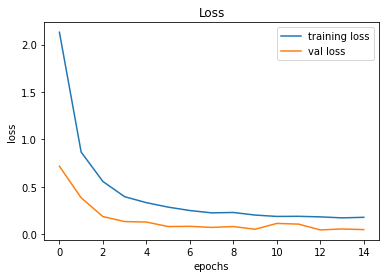

In [25]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')

plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label = 'val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

#### Testing accuracy on the test dataset

In [27]:
from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test['ClassId'].values
imgs = y_test['Path'].values

data = []

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
    
X_test = np.array(data)

pred = model.predict_classes(X_test)

# Accuracy with the test data
accuracy_score(labels, pred)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


0.9465558194774347

In [28]:
model.save("traffic_classifier.h5")